In [71]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

import os
dir_path = 'D:/Cosmas/Desktop/CroqeeStuff/Croqee-app/server_python'

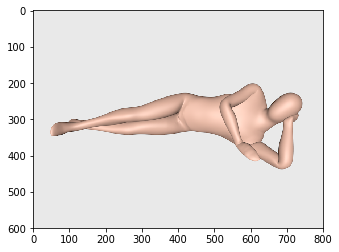

In [72]:
base_img = np.array(Image.open(dir_path + '/test_images/man-figure-5.png'))[:,:,:3]
plt.imshow(base_img)
plt.show()

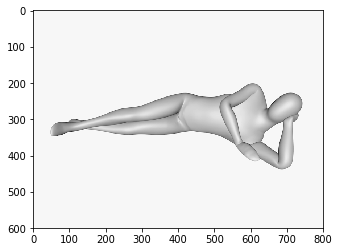

In [73]:
img1 = cv.cvtColor(base_img,cv.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')
plt.show()

In [76]:
def get_edge_magnitude(img, ksize=7):
    if len(img.shape) == 2: img = img[:, :, None]
    out_magnitude = np.zeros(img.shape[:2])
    for i in range(img.shape[2]):
        dx = cv.Sobel(img[:,:,i], cv.CV_64F, 1, 0, ksize=ksize)
        dy = cv.Sobel(img[:,:,i], cv.CV_64F, 0, 1, ksize=ksize)
        laplace = cv.Laplacian(img[:,:,i], cv.CV_64F, ksize=ksize)
        out_magnitude += np.abs(laplace) + np.sqrt(dx**2 + dy**2)
    out_magnitude = cv.GaussianBlur(out_magnitude, (ksize, ksize), sigmaX = ksize/2, sigmaY = ksize/2)
    out_magnitude /= max(np.sum(out_magnitude, 1))
    return out_magnitude
        

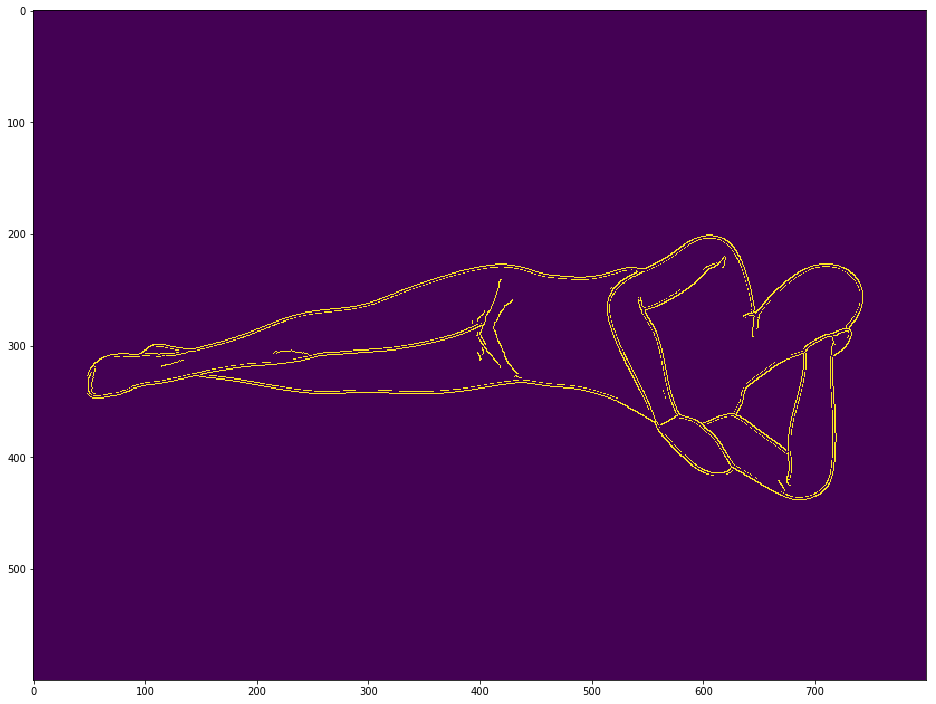

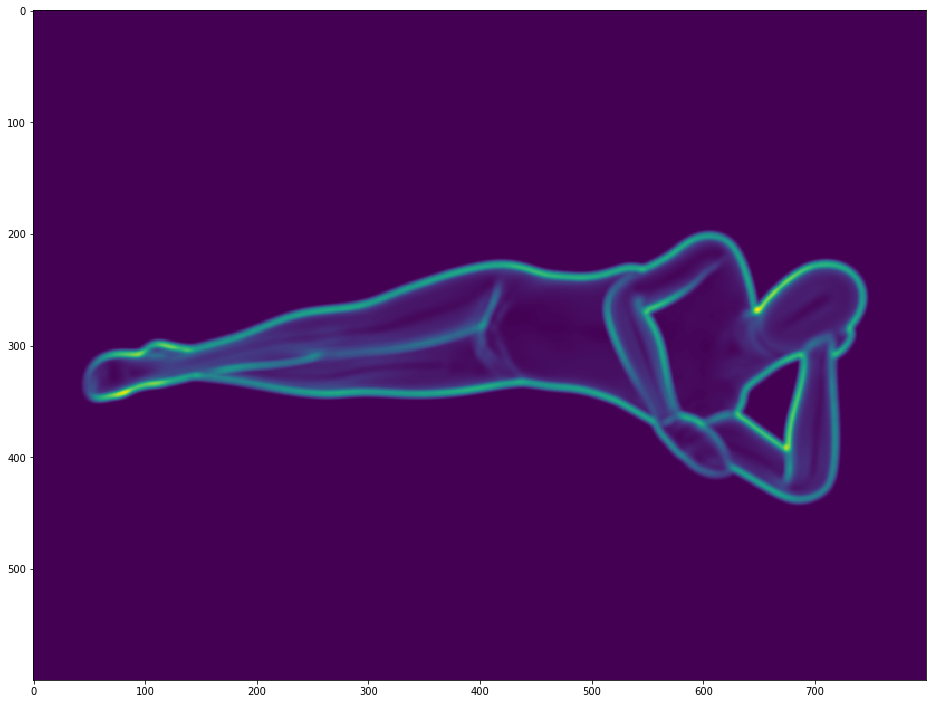

In [82]:
edges = cv.Canny(base_img[:,:,0], 20, 100)
plt.figure(figsize=(16,16))
plt.imshow(edges)
plt.show()

edge_mag = get_edge_magnitude(base_img)
plt.figure(figsize=(16,16))
plt.imshow(edge_mag)
plt.show()
